In [1]:
# Deskripsi program
print("-Program: Toko Cetak Pas Foto-\n")
print("1. Pelanggan dapat mencetak Pas Foto sesuai dengan ukuran yang diinginkan (2X3, 3X4, atau 4X6).")
print("2. Selain itu, terdapat pilihan untuk cetak berwarna (RGB) atau hitam putih (Gray Scale).")
print("3. Pilihan ukuran dan jumlah foto yang dicetak memengaruhi harga.")
print("4.Foto dicetak dengan estimasi selesai 3 hari dari tanggal pemesanan.")
print("5. Data pelanggan akan ditampilkan dengan sebuah REST API")
print("5. Saat data pelanggan ditampilkan, terdapat harga yang harus dibayar oleh pelanggan dan tanggal selesai cetak.")

-Program: Toko Cetak Pas Foto-

1. Pelanggan dapat mencetak Pas Foto sesuai dengan ukuran yang diinginkan (2X3, 3X4, atau 4X6).
2. Selain itu, terdapat pilihan untuk cetak berwarna (RGB) atau hitam putih (Gray Scale).
3. Pilihan ukuran dan jumlah foto yang dicetak memengaruhi harga.
4.Foto dicetak dengan estimasi selesai 3 hari dari tanggal pemesanan.
5. Data pelanggan akan ditampilkan dengan sebuah REST API
5. Saat data pelanggan ditampilkan, terdapat harga yang harus dibayar oleh pelanggan dan tanggal selesai cetak.


In [2]:
# Import library yang akan digunakan
import numpy as np
import cv2
from PIL import Image 
import requests
from io import BytesIO
import pandas as pd
from IPython.core.display import HTML
from flask import Flask, request
from flask_restful import Resource, Api

In [3]:
# Dataframe untuk data pelanggan
data=pd.DataFrame()

In [4]:
print("============================================Proses di Pelanggan========================================================")

============================================Proses di Pelanggan========================================================


In [35]:
# Masukan data pelanggan dan detail foto
nama = input("Nama Pelanggan: ")
tanggal = input ("Tanggal pemesanan (DD-MM-YYYY): ")
ukuran = input("Ukuran Pas Foto (2X3, 3X4, 4X6): ")
jumlah = input("Jumlah Pas Foto yang dicetak: ")
warna = input("Warna Pas Foto (RGB/Gray Scale):  ")

Nama Pelanggan: Adit
Tanggal pemesanan (DD-MM-YYYY): 15-12-2020
Ukuran Pas Foto (2X3, 3X4, 4X6): 3X4
Jumlah Pas Foto yang dicetak: 6
Warna Pas Foto (RGB/Gray Scale):  Gray Scale


In [36]:
from datetime import datetime, timedelta
tgl_order = datetime.strptime(tanggal, "%d-%m-%Y")
estimasi = tgl_order+timedelta(days=3)
tgl_selesai=datetime.strptime(str(estimasi.date()), "%Y-%m-%d").strftime("%d-%m-%Y")
tgl_order=datetime.strptime(str(tgl_order.date()), "%Y-%m-%d").strftime("%d-%m-%Y")

In [37]:
# Perhitungan harga 
jumlah = int(jumlah)
if ukuran == '2X3':
    harga = jumlah*2000
elif ukuran == "3X4":
    harga = jumlah*3000
else:
    harga = jumlah*4000

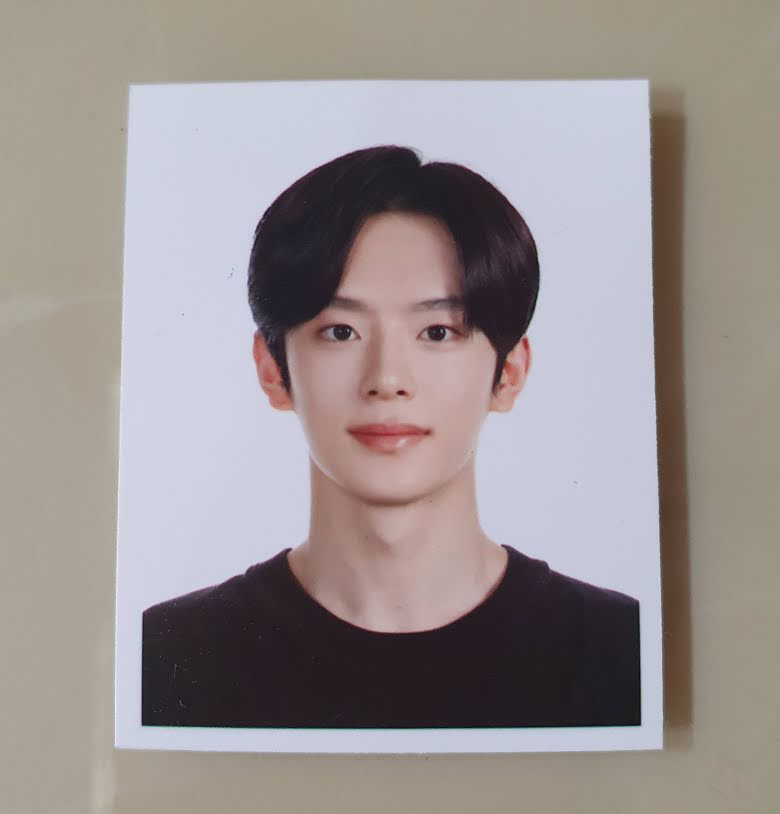

In [38]:
# Import foto
url="https://heynoona.com/wp-content/uploads/2020/09/unnamed-1-1.jpg"
response = requests.get(url)
foto = Image.open(BytesIO(response.content))
foto

In [39]:
# Mengubah citra RGB menjadi Gray Scale jika pelanggan memilih cetak foto hitam putih
if warna == "Gray Scale":
    gray = cv2.cvtColor(np.float32(foto), cv2.COLOR_BGR2GRAY)
    foto=gray
    Image.fromarray(foto).show()
else:
    foto.show()

In [40]:
# Tabel data pelanggan
pasfoto = url
data_pelanggan={'Nama': nama, 'Tanggal Pesan': tgl_order,'Tanggal Selesai': tgl_selesai, 'Ukuran': ukuran,
         'Jumlah': jumlah, 'Warna': warna, 'Harga': harga, 'Foto': pasfoto}

new_data=pd.DataFrame([data_pelanggan])
data = pd.concat([data, new_data], ignore_index=True)

In [41]:
# Convert url ke html tags
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

# Rendering image dengan HTML
tabel_foto=data.to_html(escape=False, formatters=dict(Foto=path_to_image_html))
tabel_foto=HTML(data.to_html(escape=False,formatters=dict(Foto=path_to_image_html)))

In [42]:
# REST API - Inisiasi object dan membuat class resource
pelanggan=data_pelanggan
app = Flask(__name__)
api = Api (app)

class ContohResource(Resource):
    def get(self):
        return pelanggan
    def post(self):
        request.post(pelanggan)
        response = {"msg" : "Data berhasil dimasukan"}
        return response

In [43]:
# Keluaran data yang diterima pelanggan
print ("Nama Anda : "+ nama)
print ("Tanggal Selesai: ",tgl_selesai)
print ("Ukuran Pas Foto: "+ ukuran)
print ("Jumlah Foto: ", jumlah)
print ("Harga: ", harga)

Nama Anda : Adit
Tanggal Selesai:  18-12-2020
Ukuran Pas Foto: 3X4
Jumlah Foto:  6
Harga:  18000


In [44]:
print("============================================Proses di Admin========================================================")

============================================Proses di Admin========================================================


In [45]:
data_tampil=data
data_tampil

,Nama,Tanggal Pesan,Tanggal Selesai,Ukuran,Jumlah,Warna,Harga,Foto
0,Rama,01-12-2020,04-12-2020,2X3,4,RGB,8000,https://i.pinimg.com/originals/fc/32/f3/fc32f3...
1,Toni,13-12-2020,16-12-2020,4X6,7,Gray Scale,28000,https://heynoona.com/wp-content/uploads/2020/0...
2,Adit,15-12-2020,18-12-2020,3X4,6,Gray Scale,18000,https://heynoona.com/wp-content/uploads/2020/0...


In [46]:
tabel_foto

,Nama,Tanggal Pesan,Tanggal Selesai,Ukuran,Jumlah,Warna,Harga,Foto
0,Rama,01-12-2020,04-12-2020,2X3,4,RGB,8000,
1,Toni,13-12-2020,16-12-2020,4X6,7,Gray Scale,28000,
2,Adit,15-12-2020,18-12-2020,3X4,6,Gray Scale,18000,


In [47]:
# Setup resource
api.add_resource(ContohResource,"/foto", methods=["GET","POST"])
if __name__ == "__main__":
    app.run(debug=False, port=5005)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5005/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Dec/2020 19:34:18] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [12/Dec/2020 19:34:21] "GET /foto HTTP/1.1" 200 -


In [48]:
# Menyimpan data pelanggan ke excel
data.to_excel (r'C:\Users\daulika pratiwi\Downloads\Daulika Pratiwi\Soal_6\Soal_6.xlsx', index = False, header=True)